<a href="https://colab.research.google.com/github/Mdanish2020/Customer_Segmentation_Project/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invoice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

## **Business Objective**
---
---
Customer Segmentation is a most popular and common technique to used by the most of the e-commerce retail companies. In order to increase top line and bottom line of the company, they need to inspect some things where customer segmentation helps a lot.

The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.

Main objective is to find the solution of the following questions:

* **We want to know who my customers are(belongs to which class)**
* **What they like to purchase and in what amount they purchase?**
* **How frequent they purchase?**
* **When they purchase?(Seasonal, Festivals, occasionally)**
* **Which products are sold in large amount.**

Keeping all these things in our mind we can start our analysis, and we can easily target customers.

In [83]:
# importing important libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [84]:
# Mounting drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### *Let's invite our data*

In [85]:
# inviting dataset
customer_data = pd.read_excel('/content/drive/MyDrive/Data/Unsupervised/Online Retail.xlsx')

### **Data summary**
---

In [86]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [87]:
# getting shape of our data
customer_data.shape

(541909, 8)

we have 5,41,909 instances and 8 features in our dataset

In [88]:
# getting information of all features 
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [89]:
# getting all null values and their percentages in each column
null_values = customer_data.isnull().sum()
total = len(customer_data)
null_percent = (null_values/total)*100
null_df = pd.concat([null_values,null_percent],axis = 1,keys = ['Total Null Values','Percentage %'])
null_df

,Total Null Values,Percentage %
InvoiceNo,0,0.000000
StockCode,0,0.000000
Description,1454,0.268311
Quantity,0,0.000000
InvoiceDate,0,0.000000
UnitPrice,0,0.000000
CustomerID,135080,24.926694
Country,0,0.000000


**Around 24.93% customer IDs are missing in our dataset and 0.268% product descriptions are missing these are such features that we cannot impute with other values because customer IDs are unique for each customer, so we have to drop these instances.**

In [90]:
customer_data.dropna(axis = 0, inplace = True)

In [91]:
customer_data.shape

(406829, 8)

**Now, we have left with 4,06,829 instances in our dataset after dropping null values.**  

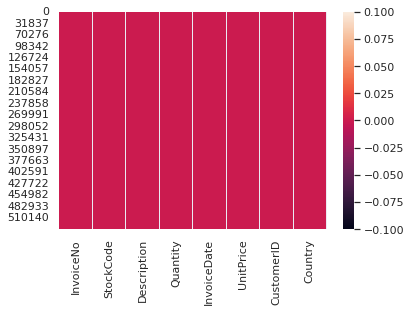

In [92]:
# visualizing null values 
sns.heatmap(customer_data.isnull())

It can be easily in the heatmap that null values are removed from the data.

### Descriptive Statistics

In [93]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the above descriptive statistics as it can be seen that we are dealing with outliers here, in this case median would be the best measure of central tendency to consider.
* Customers usually buy 5 quantity of products.
* Companies get paid by the customer for one unit is about 1.95.

---
## **FEATURE ENGINEERING**

In [94]:
# Introducing new features(Invoice_year,Invoice_Month,Invoice_Day,Invoice_Hour) from InvoiceDate column
import datetime as dt
customer_data["Invoice_Year"] = customer_data['InvoiceDate'].dt.year
customer_data['Invoice_Month'] = customer_data['InvoiceDate'].dt.strftime('%B')
customer_data['Invoice_Day'] = customer_data['InvoiceDate'].dt.strftime('%A')
customer_data['Invoice_Hour'] = customer_data['InvoiceDate'].dt.hour

In [95]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8


* Quantity: Total quantity purchased by a customer
* UnitPrice: Price of the one quantity

#### Multiplying total quantity to unit price of the product. 
### $$TotalAmount = Quantity * UnitPrice$$

In [96]:
# creating a new feature total amount
customer_data['Total_Amount']=customer_data['Quantity']*customer_data['UnitPrice']

In [97]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00


In [98]:
customer_data.shape

(406829, 13)

---
## **EXPLORATORY DATA ANALYSIS**
---
---
### **UNIVARIATE ANALYSIS**

In [99]:
numerical_features = list(customer_data.select_dtypes(['int64','float64']))
numerical_features

['Quantity',
 'UnitPrice',
 'CustomerID',
 'Invoice_Year',
 'Invoice_Hour',
 'Total_Amount']

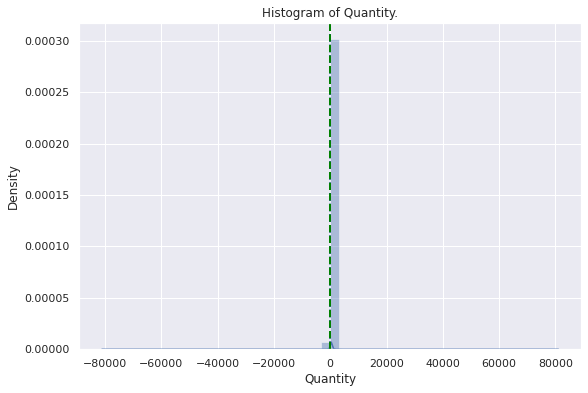

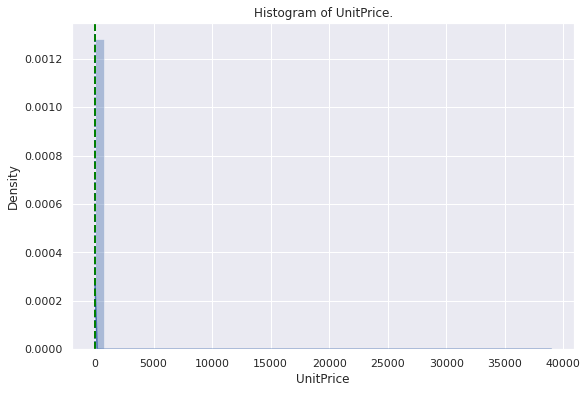

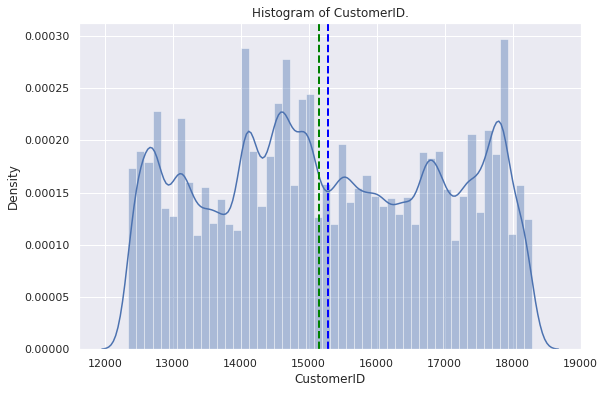

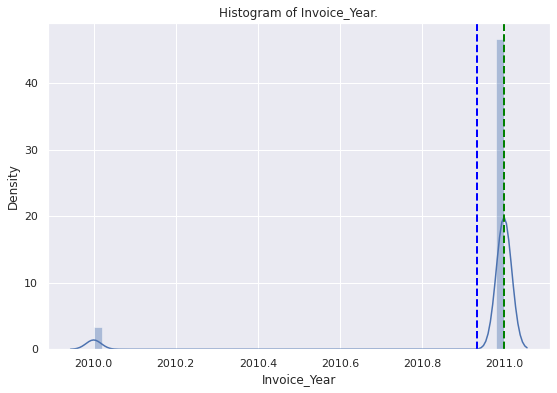

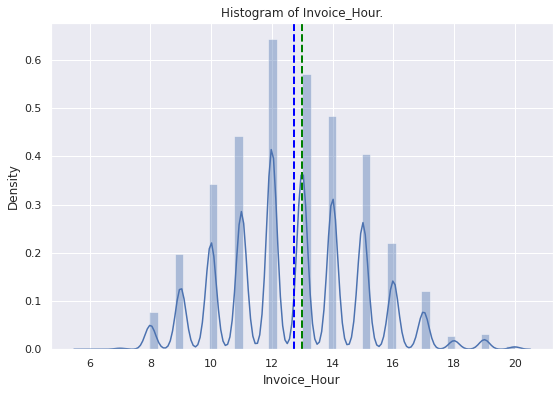

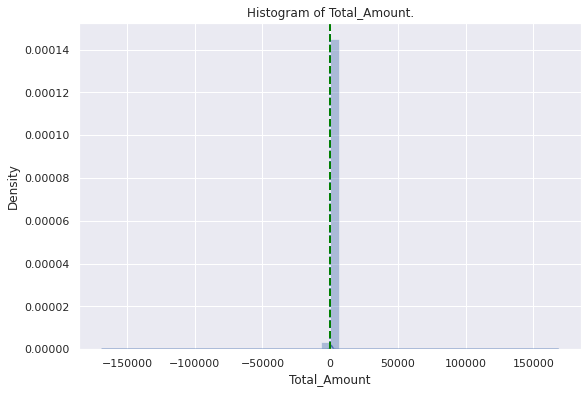

In [100]:
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature = (customer_data[col])
  sns.distplot(customer_data[col],ax = ax)
  ax.axvline(feature.mean(),color='blue', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='green', linestyle='dashed', linewidth=2)
  ax.set_title(f'Histogram of {col}.')
  plt.show()

### **TOP CUSTOMERS**

In [101]:
top_customers = pd.DataFrame(customer_data['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
top_customers.rename(columns = {'index':'CustomerID','CustomerID':'count'},inplace = True)
top_customers.head(5)

,CustomerID,count
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782


Text(0.5, 1.0, "Top 5 Cusotmer's ID.")

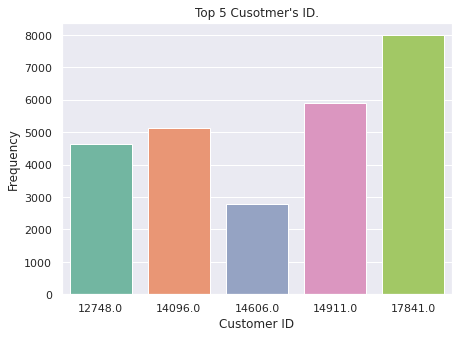

In [102]:
# Plotting top five customers 
plt.figure(figsize = (7,5))
sns.barplot(x = 'CustomerID',y = 'count',palette= 'Set2',data = top_customers[:5])
plt.xlabel('Customer ID')
plt.ylabel('Frequency')
plt.title("Top 5 Cusotmer's ID.")

In [103]:
customer_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Invoice_Year', 'Invoice_Month',
       'Invoice_Day', 'Invoice_Hour', 'Total_Amount'],
      dtype='object')

### **TOP COUNTRIES**

In [104]:
top_countries = pd.DataFrame(customer_data['Country'].value_counts().sort_values(ascending = False).reset_index())
top_countries.rename(columns = {'index':'Country','Country':'Total Counts'},inplace = True)
top_countries.head(5)

,Country,Total Counts
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533


Text(0.5, 1.0, 'Top 5 Countries.')

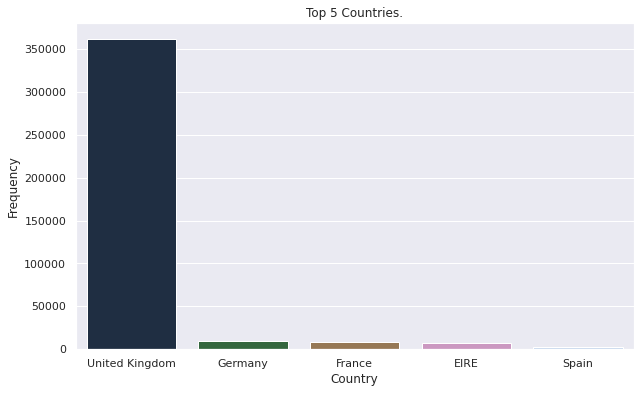

In [105]:
# Plotting top five Countries 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Country',y = 'Total Counts',palette= 'cubehelix',data = top_countries[:5])
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.title("Top 5 Countries.")

### **TOTAL PURCHASING IN YEARS**


In [106]:
# Creating dataframe for Invoice_Year
purchase_year = customer_data['Invoice_Year'].value_counts().sort_values(ascending = False).reset_index()
purchase_year.rename(columns = {'index':'Invoice_Year','Invoice_Year':'Frequency'},inplace = True)
purchase_year

,Invoice_Year,Frequency
0,2011,379979
1,2010,26850


Text(0.5, 1.0, 'Total Purchasing in Years.')

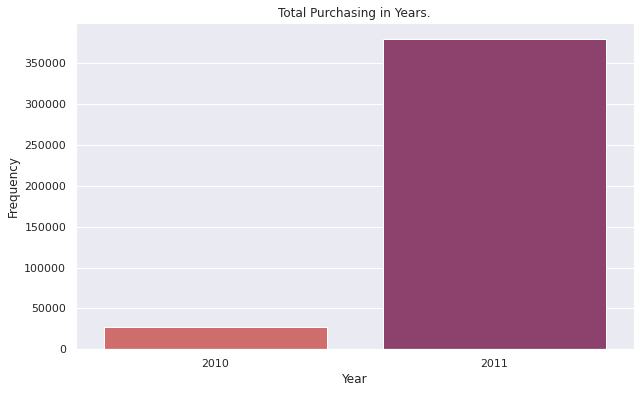

In [107]:
# Plotting total invoices with year
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Year',y = 'Frequency',palette= 'flare',data = purchase_year)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title("Total Purchasing in Years.")

### **TOP MONTHS**

In [108]:
# Creating dataframe for Invoice_Months counts
top_months = pd.DataFrame(customer_data['Invoice_Month'].value_counts().sort_values(ascending = False).reset_index())
top_months.rename(columns = {'index':'Invoice_Month','Invoice_Month':'Total Frequency'},inplace = True)
top_months.head(5)

,Invoice_Month,Total Frequency
0,November,65598
1,October,50695
2,December,44511
3,September,40822
4,May,28908


Text(0.5, 1.0, 'Top 5 Purchasing Months.')

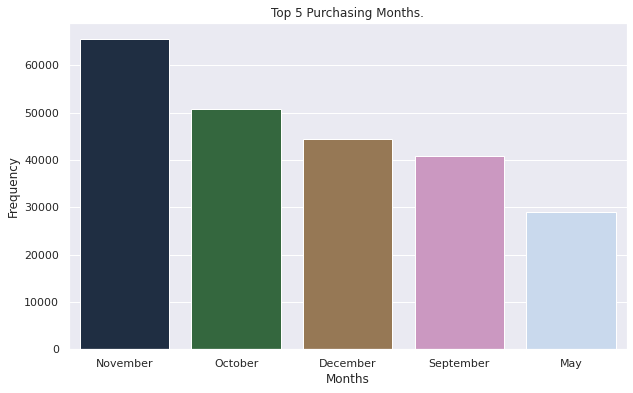

In [109]:
# Plotting top customers' purchasing in different five Months 
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Month',y = 'Total Frequency',palette= 'cubehelix',data = top_months[:5])
plt.xlabel('Months')
plt.ylabel('Frequency')
plt.title("Top 5 Purchasing Months.")

### **TOP DAYS**

In [110]:
# Creating dataframe for Invoice_Days counts
top_days = pd.DataFrame(customer_data['Invoice_Day'].value_counts().sort_values(ascending = False).reset_index())
top_days.rename(columns = {'index':'Invoice_Day','Invoice_Day':'Total Frequency'},inplace = True)
top_days.head(5)

,Invoice_Day,Total Frequency
0,Thursday,82374
1,Wednesday,70599
2,Tuesday,68110
3,Monday,66382
4,Sunday,63237


Text(0.5, 1.0, 'Purchasing on different Days.')

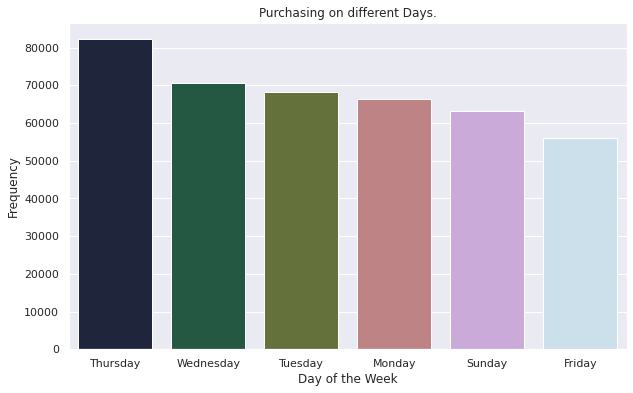

In [111]:
# Purchasings of customers on different days
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Day',y = 'Total Frequency',palette= 'cubehelix',data = top_days)
plt.xlabel('Day of the Week')
plt.ylabel('Frequency')
plt.title("Purchasing on different Days.")

### **TOP HOURS**

In [112]:
# Creating dataframe for Invoice_Months counts
top_hours = pd.DataFrame(customer_data['Invoice_Hour'].value_counts().sort_values(ascending = False).reset_index())
top_hours.rename(columns = {'index':'Invoice_Hour','Invoice_Hour':'Total Frequency'},inplace = True)
top_hours.head(5)

,Invoice_Hour,Total Frequency
0,12,73342
1,13,65062
2,14,55075
3,11,50249
4,15,46220


Text(0.5, 1.0, 'Purchasing Hours.')

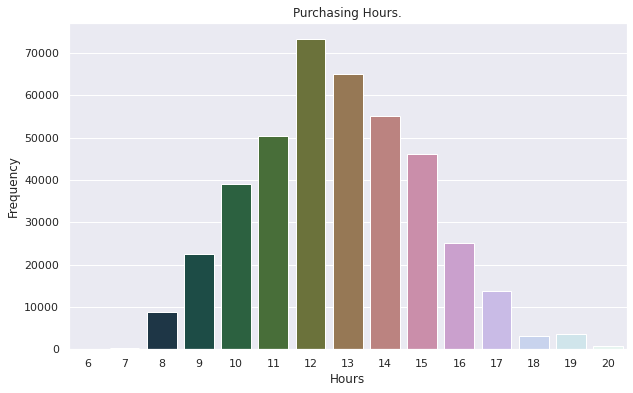

In [113]:
# Plotting purchases at different hours
plt.figure(figsize = (10,6))
sns.barplot(x = 'Invoice_Hour',y = 'Total Frequency',palette = 'cubehelix',data = top_hours)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title("Purchasing Hours.")

### **TOP PURCHASED PRODUCTS**

In [114]:
# Creating dataframe for descriptions of products
description_df = customer_data['Description'].value_counts().sort_values(ascending = False).reset_index()
description_df.rename(columns={'index': 'Product_Description','Description':'Frequency'}, inplace=True)
# Top five products
description_df.head()

,Product_Description,Frequency
0,WHITE HANGING HEART T-LIGHT HOLDER,2070
1,REGENCY CAKESTAND 3 TIER,1905
2,JUMBO BAG RED RETROSPOT,1662
3,ASSORTED COLOUR BIRD ORNAMENT,1418
4,PARTY BUNTING,1416


In [115]:
#bottom five products
description_df.tail()

,Product_Description,Frequency
3891,KNITTED RABBIT DOLL,1
3892,BAKING MOULD CUPCAKE CHOCOLATE,1
3893,GREEN/BLUE CERAMIC CANDLE HOLDER,1
3894,CURIOUS IMAGES SCRAP BOOK SET,1
3895,WEEKEND BAG VINTAGE ROSE PAISLEY,1


Text(0.5, 1.0, 'Top Five Products.')

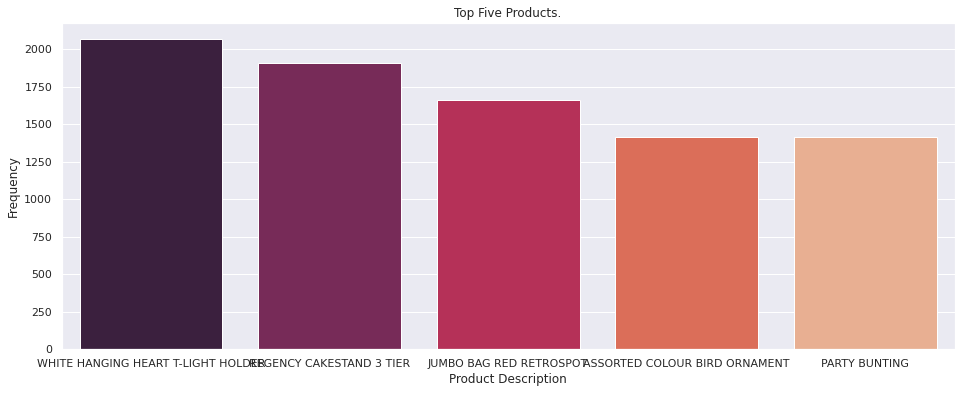

In [116]:
# Plotting the top five products purchasing
plt.figure(figsize = (16,6))
sns.barplot(x = 'Product_Description',y = 'Frequency',palette = 'rocket',data = description_df[:5])
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation = 0)
plt.title("Top Five Products.")

Text(0.5, 1.0, 'Bottom Five Products.')

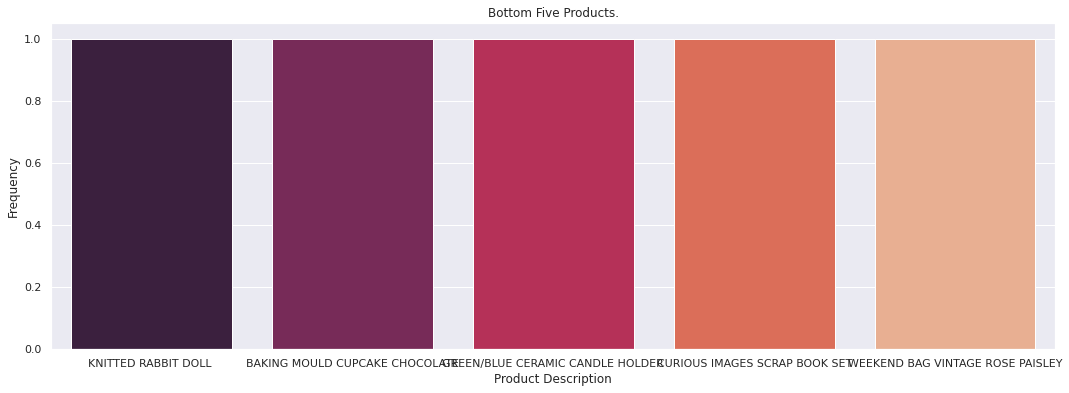

In [117]:
# Bottom five products
# Plotting the top five products purchasing
plt.figure(figsize = (18,6))
sns.barplot(x = 'Product_Description',y = 'Frequency',palette = 'rocket',data = description_df[-5:])
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.title("Bottom Five Products.")

### **TOTAL AMOUNT**

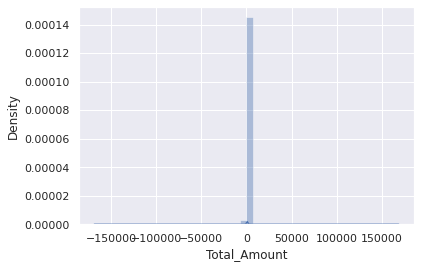

In [118]:
sns.distplot(customer_data['Total_Amount'])

In [119]:
# get rid of the negative amounts
total_amount_df = customer_data[customer_data['Total_Amount']>0]

Text(0.5, 1.0, 'Distribution of Total Amount')

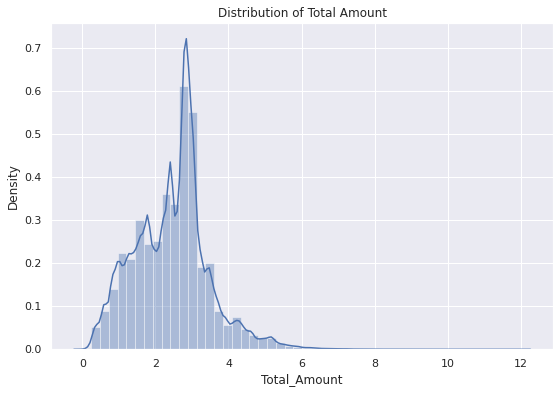

In [120]:
# Distribution of total amounts
plt.figure(figsize = (9,6))
sns.distplot(np.log1p(total_amount_df['Total_Amount']))
plt.title('Distribution of Total Amount')

In [121]:
def business_insight(data):
  if(data < 0):
    return 'Bad for business'
  else:
    return 'Good for business'
  return data

In [122]:
customer_dup_data = customer_data.copy()

In [123]:
customer_dup_data['Business_insight'] = customer_dup_data['Total_Amount'].apply(business_insight)

In [124]:
business_insight_df = pd.DataFrame(customer_dup_data.groupby('Business_insight',sort = False).agg({'CustomerID': 'count'}))
business_insight_df.head(5)

,CustomerID
Business_insight,
Good for business,397924
Bad for business,8905


Text(0.5, 1.0, 'Total Number of IDs giving a Good and Bad business.')

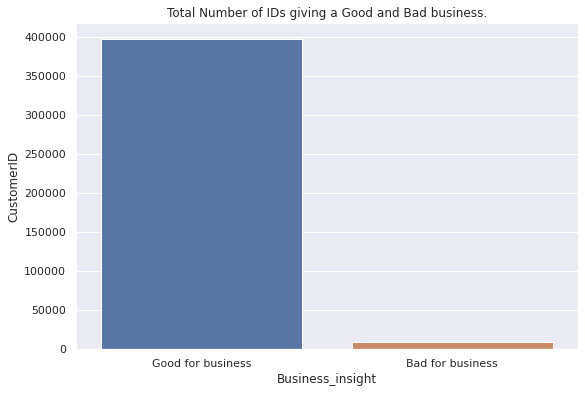

In [125]:
plt.figure(figsize = (9,6))
sns.barplot(x= business_insight_df.index, y=business_insight_df['CustomerID'])
plt.title('Total Number of IDs giving a Good and Bad business.')

### **CORRELATION MATRIX**


Text(0.5, 1.0, 'CORRELTAION MATRIX')

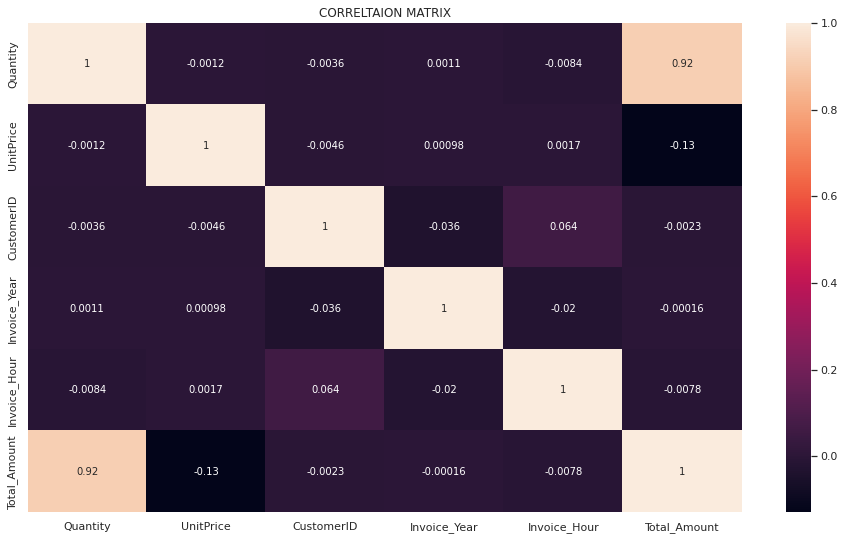

In [126]:
# correlation between various columns
plt.figure(figsize = (16,9))
sns.heatmap(customer_data.corr(), annot = True)
plt.title('CORRELTAION MATRIX')

---
# **RFM MODEL(Recency, Frequency, Monetary Value)**
### Recency, frequency, monetary value is a marketing analysis tool used to identify a company's or an organization's best customers by using certain measures. The RFM model is based on three quantitative factors.
* Recency: Customers who made purchases recently.
* Frequency: How often a customer makes a purchase.
* Monetary Value: How much money a customer spends on.

#### Performing RFM Segmentation and RFM Analysis, Step by Step 
* The first step in building an RFM model is to assign Recency, Frequency and Monetary values to each customer. 
* The second step is to divide the customer list into tiered groups for each of the three dimensions (R, F and M).

---
---


### **RECENCY**


In [127]:
customer_data.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Year,Invoice_Month,Invoice_Day,Invoice_Hour,Total_Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,December,Wednesday,8,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,December,Wednesday,8,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,December,Wednesday,8,22.00


In [128]:
customer_data['InvoiceNo'] = customer_data['InvoiceNo'].astype('str')
customer_data = customer_data[~customer_data['InvoiceNo'].str.contains('C')]

In [129]:
# creating column for only date
customer_data['Invoice_Date'] = customer_data['InvoiceDate'].dt.date
snapshot_date = max(customer_data.InvoiceDate) + dt.timedelta(days=1)
# Creating dataframe to record RFM score
RFM_df = customer_data.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'Total_Amount': 'sum'}).reset_index()
# Renaming columns
RFM_df.rename(columns = {'InvoiceDate': 'Recency',
                            'InvoiceNo': 'Frequency',
                            'Total_Amount': 'MonetaryValue'}, inplace=True)

In [130]:
snapshot_date

Timestamp('2011-12-10 12:50:00')

In [131]:
RFM_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,326,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,19,73,1757.55
4,12350.0,310,17,334.40
5,12352.0,36,85,2506.04
6,12353.0,204,4,89.00
7,12354.0,232,58,1079.40
8,12355.0,214,13,459.40
9,12356.0,23,59,2811.43


#### **RECENCY DISTRIBUTION PLOT**


Text(0.5, 1.0, 'Recency Distribution Plot')

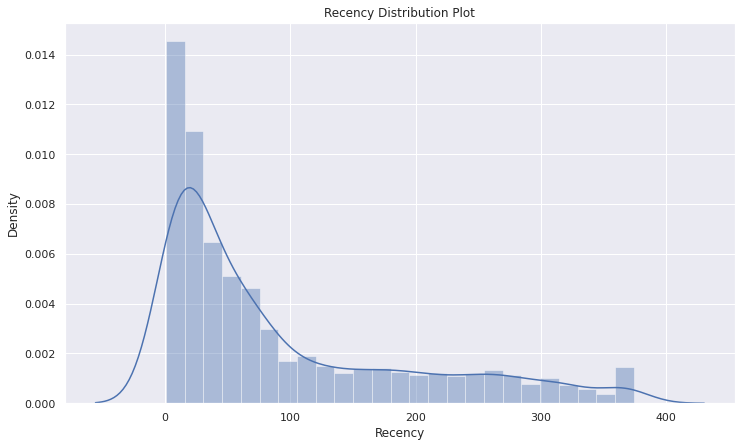

In [132]:
# distribution plot for recency of customers
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.Recency)
plt.title('Recency Distribution Plot')

### **FREQUENCY DISTRIBUTION PLOT**

Text(0.5, 1.0, 'Frequency Distribution Plot')

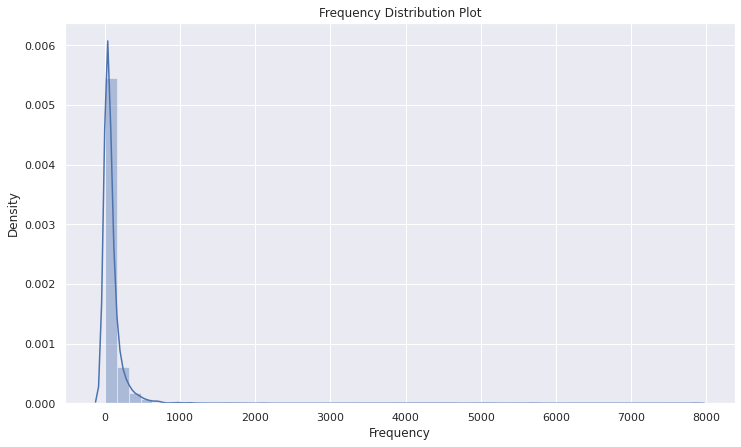

In [133]:
# distplot of Frequency of customers' purchasing
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.Frequency)
plt.title('Frequency Distribution Plot')

### **MONETARY DISTRIBUTION PLOT**

Text(0.5, 1.0, 'Monetary Distribution Plot')

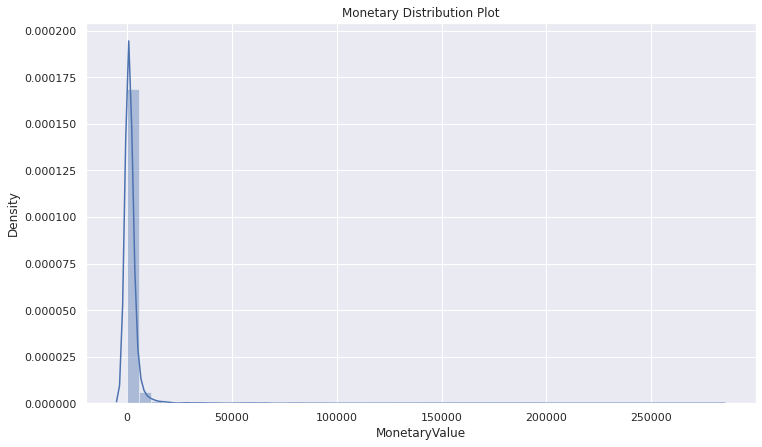

In [134]:
# distplot of Monetary value
plt.figure(figsize = (12,7))
sns.set()
sns.distplot(RFM_df.MonetaryValue)
plt.title('Monetary Distribution Plot')

### **CORRELATION MAPPING AMONG RFM**

Text(0.5, 1.0, 'Correlation among RFM')

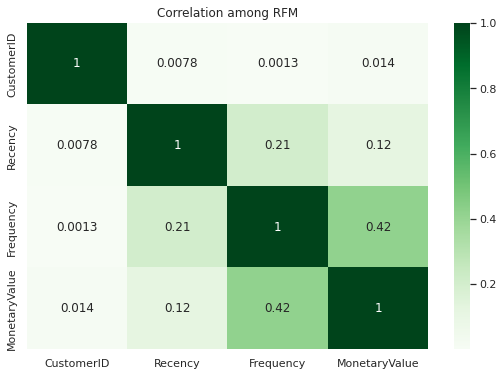

In [135]:
# Correlation mapping between RFM df
rfm_correlation = RFM_df.corr()
# correlation between of Recency, Frequency and MonetaryValue
plt.figure(figsize = (9,6))
sns.heatmap(abs(rfm_correlation), cmap = 'Greens', annot = True)
plt.title('Correlation among RFM')

### **SPLITTING INTO FOUR SEGMENTS USING QUANTILES**

In [136]:
# Split into four segments using quantiles
quantiles = RFM_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
quantiles       

{'CustomerID': {0.25: 13812.5, 0.5: 15299.0, 0.75: 16778.5},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'MonetaryValue': {0.25: 307.24499999999995,
  0.5: 674.4499999999998,
  0.75: 1661.6400000000003},
 'Recency': {0.25: 18.0, 0.5: 51.0, 0.75: 142.0}}

In [137]:
# Functions to create R,F and M segments
def RScoring(x,p,d):
  if x <= d[p][0.25]:
    return 1
  elif x <= d[p][0.5]:
    return 2
  elif x <= d[p][0.75]:
    return 3
  else:
    return 4
def FnMScoring(x,p,d):
  if x <= d[p][0.25]:
    return 4
  elif x <= d[p][0.5]:
    return 3
  elif x <= d[p][0.75]:
    return 2
  else:
    return 1

In [138]:
# Calculate and addd R, F and M segment value columns in the existing dataset to show R, F and M segment values
RFM_df['R'] = RFM_df['Recency'].apply(RScoring, args=('Recency',quantiles,))
RFM_df['F'] = RFM_df['Frequency'].apply(FnMScoring, args=('Frequency',quantiles,))
RFM_df['M'] = RFM_df['MonetaryValue'].apply(FnMScoring, args=('MonetaryValue',quantiles,))
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M
0,12346.0,326,1,77183.60,4,4,1
1,12347.0,2,182,4310.00,1,1,1
2,12348.0,75,31,1797.24,3,3,1
3,12349.0,19,73,1757.55,2,2,1
4,12350.0,310,17,334.40,4,4,3


In [139]:
#Calculate and Add RFMScore value column showing total sum of RFMGroup values
RFM_df['RFMScore'] = RFM_df[['R', 'F', 'M']].sum(axis = 1)
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
0,12346.0,326,1,77183.60,4,4,1,9
1,12347.0,2,182,4310.00,1,1,1,3
2,12348.0,75,31,1797.24,3,3,1,7
3,12349.0,19,73,1757.55,2,2,1,5
4,12350.0,310,17,334.40,4,4,3,11


In [140]:
#Calculate and Add RFMGroup value column showing combined concatenated score of RFM
RFM_df['RFMGroup'] = RFM_df.R.map(str) + RFM_df.F.map(str) + RFM_df.M.map(str)
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore,RFMGroup
0,12346.0,326,1,77183.60,4,4,1,9,441
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,19,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443


**Interpretation**

**RFMScore**: It is the sum of R, F and M value that assigned by quantiles.

**RFMGroup**: This is the combination of R,F, and M values.

For example:

A customer ordered a product 300 days ago, arrived on Online retail platform just once and bought 10$ dollar worth product. According to RFM table he got R = 4(Recency is very low), F = 4(Frequency is very low because he arrived just once) and M = 4(Monetary value is very low). So, the RFMGroup value become 444 means he is the worst customer, we don't need to spend more time on him.

Those customer are the best customers who scored R = 1, F = 1 or 2 and M = 1 or 2 means in combination it will give RFMGroup 111,112,121 values like these are good indications.

### **REMOVING OUTLIERS**
#### For removing outliers we are going to use IQR(Inter Quantile Range)

$$IQR = Q3 - Q1$$


In [141]:
# Outlier treatment
rfm = ['Recency','Frequency','MonetaryValue']
for col in rfm:
  Q1 = RFM_df[col].quantile(0.05)
  Q3 = RFM_df[col].quantile(0.95)
  IQR = Q3 - Q1
  RFM_df = RFM_df [(RFM_df[col] >= Q1 - 1.5*IQR) & (RFM_df[col] <= Q3 + 1.5*IQR)]

In [142]:
RFM_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore,RFMGroup
1,12347.0,2,182,4310.00,1,1,1,3,111
2,12348.0,75,31,1797.24,3,3,1,7,331
3,12349.0,19,73,1757.55,2,2,1,5,221
4,12350.0,310,17,334.40,4,4,3,11,443
5,12352.0,36,85,2506.04,2,2,1,5,221


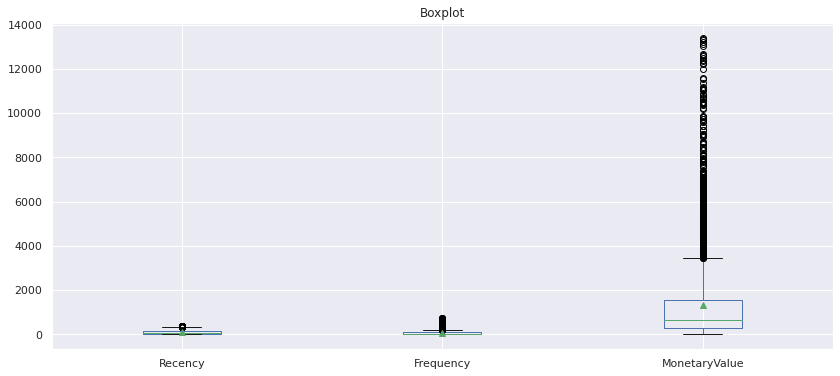

In [143]:
# Checking outliers through Boxplot 
plt.rcParams['figure.figsize']=(14,6)
ax = RFM_df[["Recency","Frequency","MonetaryValue"]].plot(kind='box', title='Boxplot', showmeans=True)
plt.show()

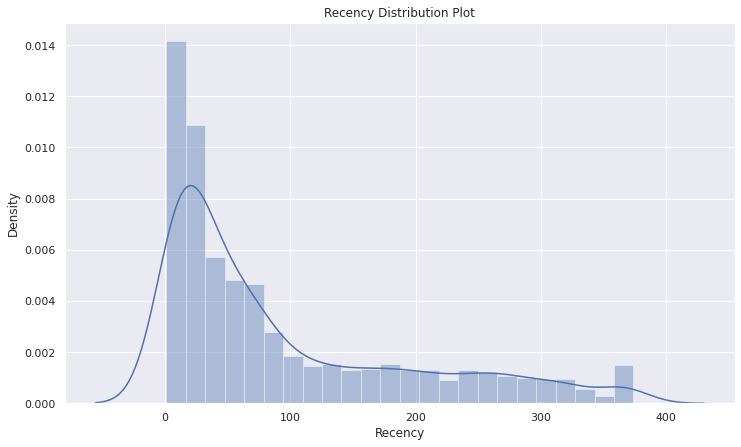

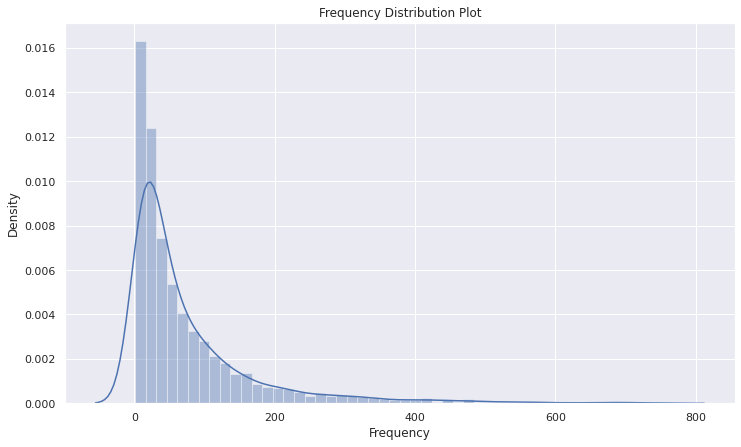

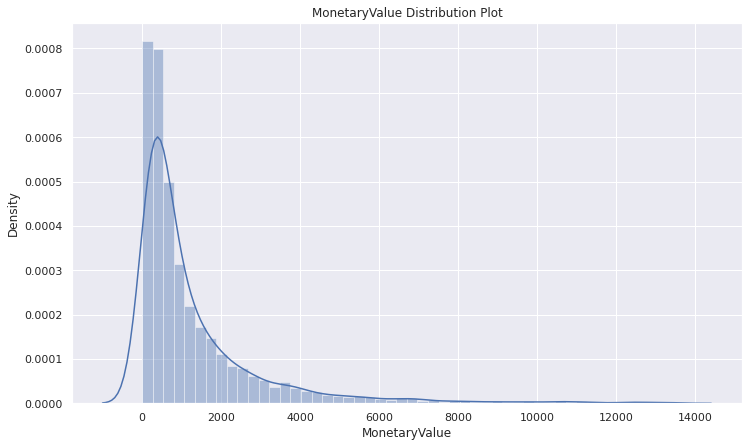

In [144]:
# Now let's check the distribution of Recency , Frequency and MonetaryValue
for col in rfm:
  plt.figure(figsize = (12,7))
  sns.set()
  sns.distplot(RFM_df[col])
  plt.title(f'{col} Distribution Plot')

Now, it can be seen we've get rid of the most of outliers in RFM df.

**All the RFM feature distributions are right skewed or positively skewed.**

### Let's check the top customers' list on the basis of RFM Score and RFMGroup value

In [145]:
# Top customers who frequent in all features
print(RFM_df[RFM_df['RFMScore'] == 3].sort_values('RFMScore', ascending = False).reset_index().head(10))
RFM_df[RFM_df['RFMScore'] == 3].shape

   index  CustomerID  Recency  Frequency  ...  F  M  RFMScore  RFMGroup
0      1     12347.0        2        182  ...  1  1         3       111
1     15     12362.0        3        266  ...  1  1         3       111
2   2981     16407.0       13        172  ...  1  1         3       111
3   2975     16401.0        1        186  ...  1  1         3       111
4   2969     16393.0        2        330  ...  1  1         3       111
5   2960     16379.0        4        108  ...  1  1         3       111
6   2944     16360.0        5        662  ...  1  1         3       111
7   2942     16358.0        1        109  ...  1  1         3       111
8   2919     16327.0       14        319  ...  1  1         3       111
9   2918     16326.0        6        319  ...  1  1         3       111

[10 rows x 10 columns]


(384, 9)

### **There are 384 customers who are the best for the our business, so we need to make plans to make them happy because these are the elite ones.**

They scored best in:

* Recency(These are the ones who visit recently)
* Frequency(These are the ones who purchased most frequently)
* Monetary(Comapany make plethora of money)

### **The second top list on the basis of RFMScore of customers**

In [146]:
# Second top customers who frequent in all features
print(RFM_df[(RFM_df['RFMScore'] > 3) & (RFM_df['RFMScore'] <= 5)].sort_values('RFMGroup', ascending = False).reset_index().head(10))
RFM_df[(RFM_df['RFMScore'] > 3) &(RFM_df['RFMScore'] <= 5)].shape

   index  CustomerID  Recency  Frequency  ...  F  M  RFMScore  RFMGroup
0   2115     15228.0       66        125  ...  1  1         5       311
1   2448     15674.0       73        114  ...  1  1         5       311
2   1610     14535.0       60        330  ...  1  1         5       311
3    441     12916.0      139        107  ...  1  1         5       311
4   1634     14565.0       96        127  ...  1  1         5       311
5   1683     14639.0       52        172  ...  1  1         5       311
6   1827     14841.0       53        138  ...  1  1         5       311
7   1829     14844.0       64        130  ...  1  1         5       311
8    393     12843.0       66        103  ...  1  1         5       311
9   1834     14852.0       58        143  ...  1  1         5       311

[10 rows x 10 columns]


(802, 9)

### **There are 802 customers who are the second best customers for the our business, we need some strategy to make them top customers.**

#### **DATA PREPARATION**


In [147]:
Log_rfm_Data = RFM_df[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log1p, axis = 1)

In [148]:
# Data preprocessing
from sklearn.preprocessing import StandardScaler
rfm_features = ['Recency', 'Frequency', 'MonetaryValue']
final_rfm = Log_rfm_Data[rfm_features].values
sc = StandardScaler()
X = sc.fit_transform(final_rfm)

---
# **MODELING**
---
---
## **IMPLEMENTING K-MEANS**

In [149]:
from sklearn.cluster import KMeans

# applying K-means clustering
clusterer = KMeans(n_clusters=3,max_iter=1000, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 1 2 ... 0 2 1]


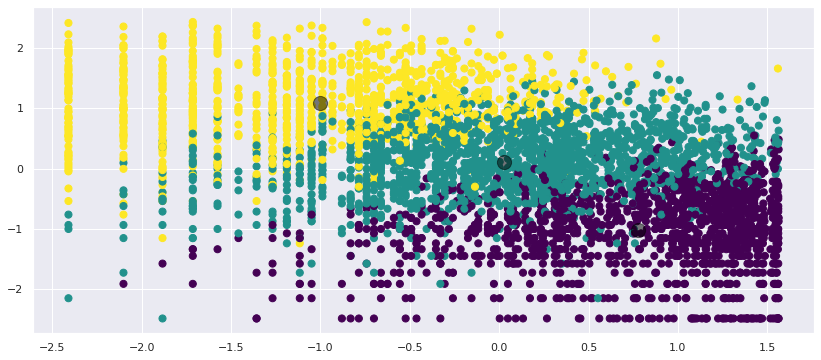

In [150]:
# plotting clusters
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')

centers = clusterer.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

In [151]:
clusterer.cluster_centers_

array([[ 0.77616338, -1.01852553, -0.97578844],
       [ 0.02840204,  0.11143614,  0.05427312],
       [-1.00093609,  1.09114147,  1.1238352 ]])

In [152]:
# assign the label
RFM_df['Cluster_Id'] =cluster_labels[0:4256]
print(RFM_df.head(6))

   CustomerID  Recency  Frequency  ...  RFMScore  RFMGroup  Cluster_Id
1     12347.0        2        182  ...         3       111           2
2     12348.0       75         31  ...         7       331           1
3     12349.0       19         73  ...         5       221           2
4     12350.0      310         17  ...        11       443           0
5     12352.0       36         85  ...         5       221           2
6     12353.0      204          4  ...        12       444           0

[6 rows x 10 columns]


In [153]:
# grouping clusters on the basis of their cluster label
RFM_df.groupby('Cluster_Id').mean()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFMScore
Cluster_Id,,,,,,,,
0,15392.568488,177.464869,14.195174,277.525253,3.388219,3.674237,3.621008,10.683463
1,15302.881176,74.654118,54.441176,897.878566,2.495882,2.411176,2.454118,7.361176
2,15198.358326,20.083697,186.490846,3195.598614,1.451613,1.316478,1.299913,4.068003


### According to the above groupby table we can easily conclude that:
* Cluster 0 comprises that these are the group of customers of whom Recency is very low, frequencies are very less and Company is generating only few bucks.
* Cluster 1 comprises that this cluster give the insights that these are marked with less frequency but more frequent than cluster 0 and company is making more money than cluster 0.
* Cluster 2 comprises that it gives the information that these are one who visits more, they are more frequent and they are helping to generate a lot of business.

**Among these three clusters we need to give more attention on the customers who belong to Cluster_Id 2.**

In [154]:
# Number of customers belonging to each cluster
RFM_df['Cluster_Id'].value_counts()

1    1700
0    1409
2    1147
Name: Cluster_Id, dtype: int64

---
## **Implementing K-means clustering with Silhoutte.**
---
---

In [155]:
# importing silhoutte
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


In [156]:
range_of_clusters = [2,3,4,5,7,8,10]

For n_clusters = 2, The average silhouette_score is :0.3980102073446338.
For n_clusters = 3, The average silhouette_score is :0.2962529539347942.
For n_clusters = 4, The average silhouette_score is :0.3048474761096056.
For n_clusters = 5, The average silhouette_score is :0.2795932252612818.
For n_clusters = 7, The average silhouette_score is :0.26627686634329506.
For n_clusters = 8, The average silhouette_score is :0.2588175073904286.
For n_clusters = 10, The average silhouette_score is :0.2720877780065119.


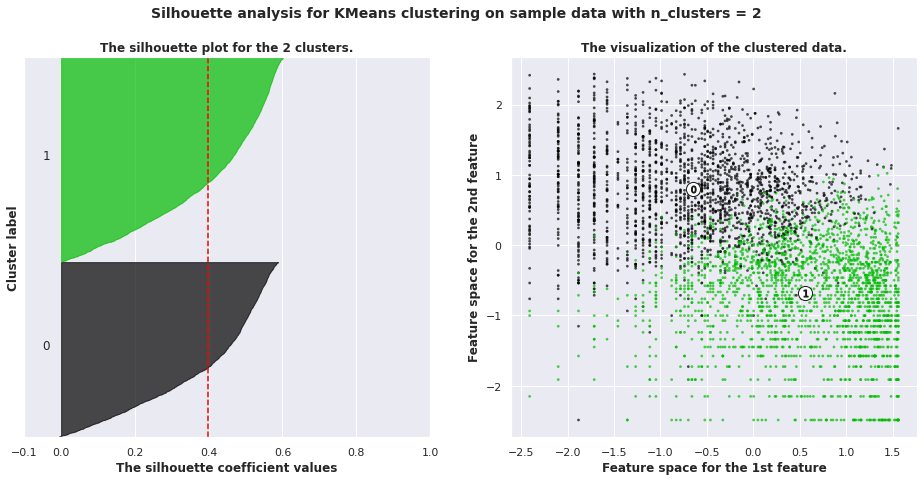

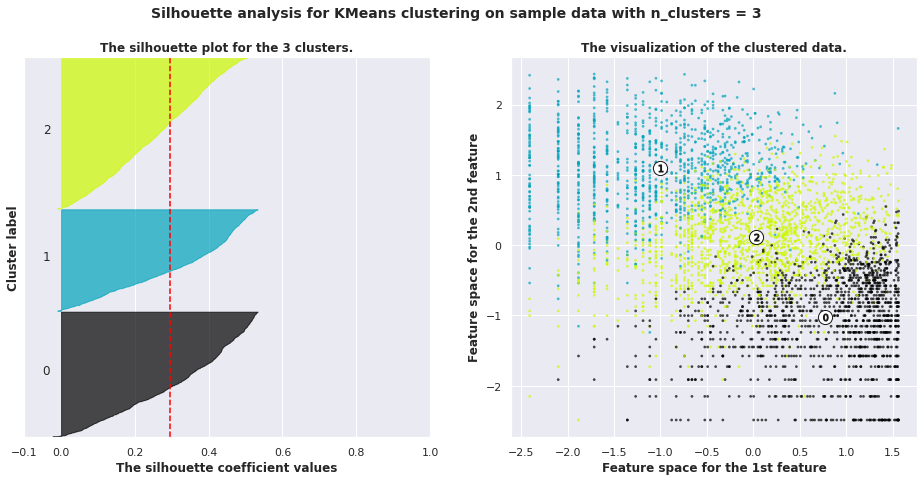

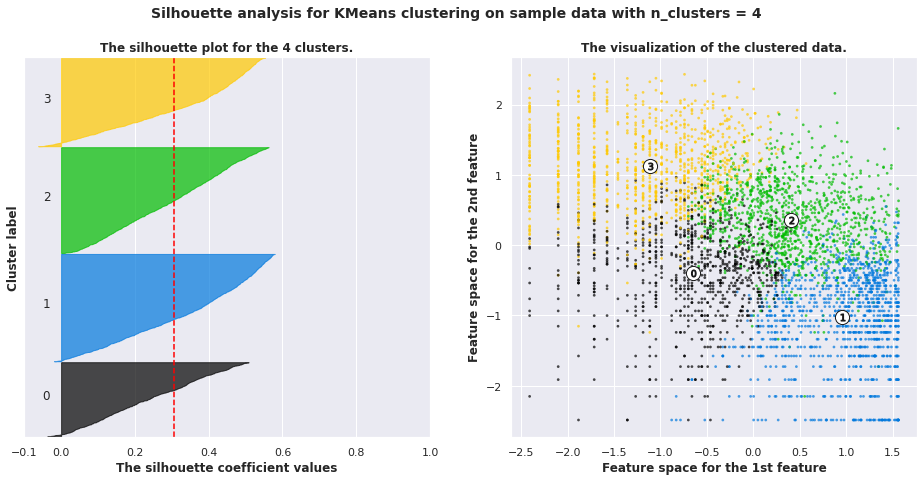

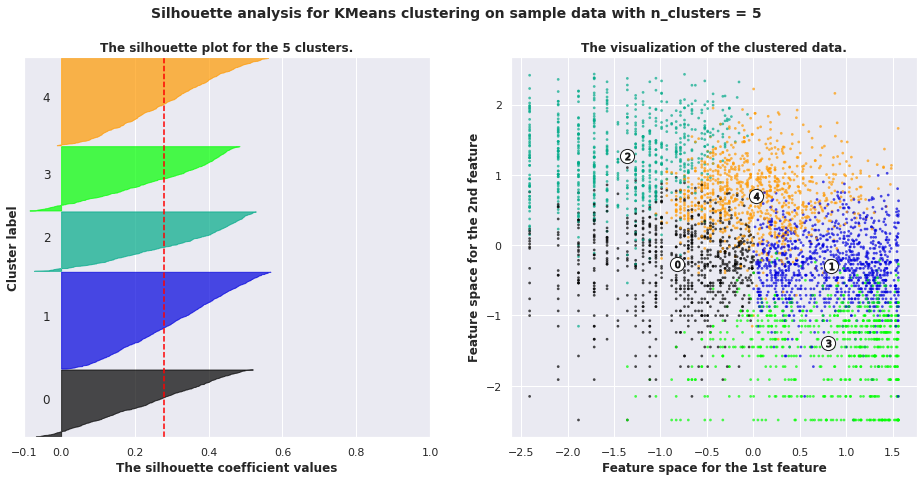

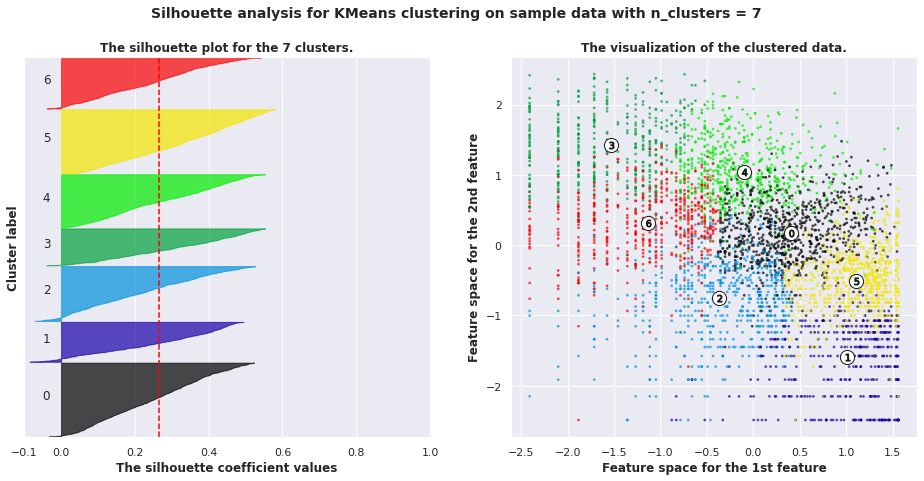

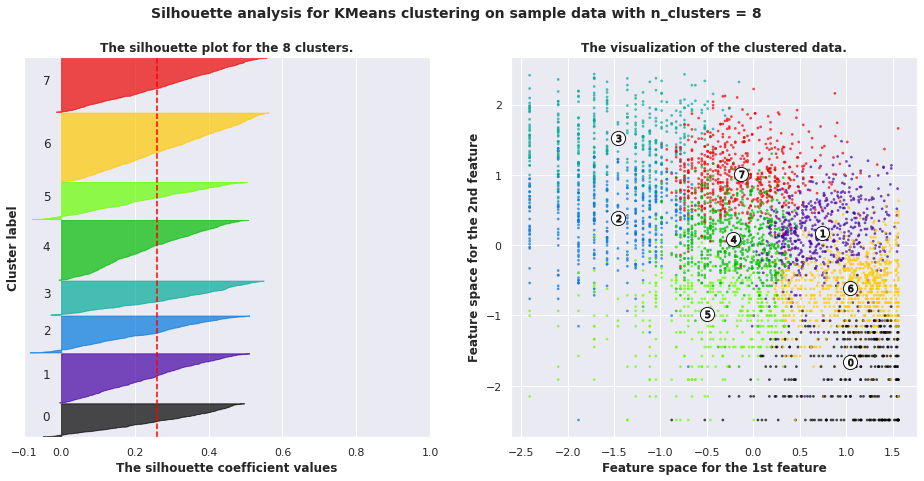

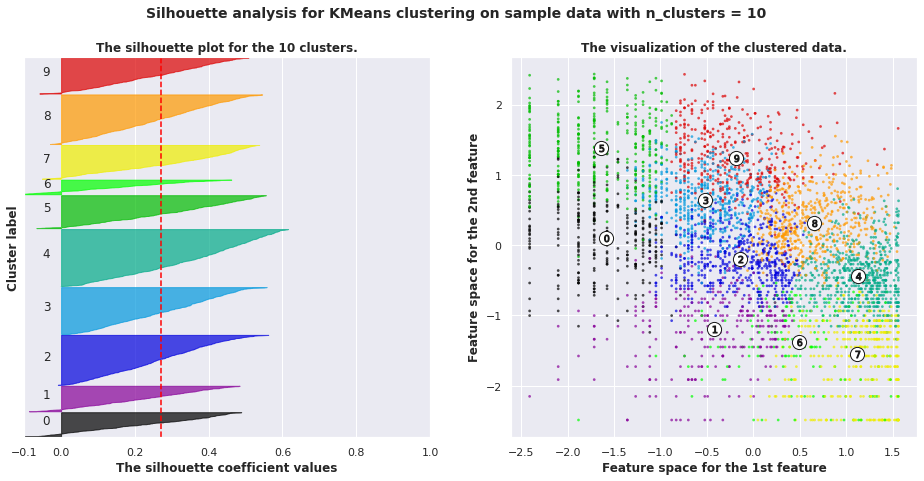

In [157]:
for n_clusters in range_of_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(16, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state= 1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters = {n_clusters}, The average silhouette_score is :{silhouette_avg}.")

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title(f"The silhouette plot for the {n_clusters} clusters.",fontweight = 'bold')
    ax1.set_xlabel("The silhouette coefficient values",fontweight = 'bold')
    ax1.set_ylabel("Cluster label", fontweight = 'bold')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.",fontweight = 'bold')
    ax2.set_xlabel("Feature space for the 1st feature",fontweight = 'bold')
    ax2.set_ylabel("Feature space for the 2nd feature",fontweight = 'bold')

    plt.suptitle((f'Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}'),
                 fontsize=14, fontweight='bold')

plt.show()

**Silhoutte Score is around 0.40 having n_clusters  = 2 which means neighouring clusters are away from eachother, there are less chance for assigning the customers into wrong clusters.**

---
## **Implementing K-means with Elbow Method**
---
---

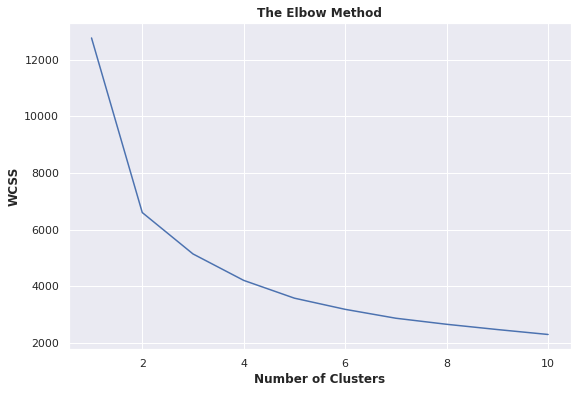

In [158]:
# within cluster sum of squares
wcss = []

for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# plotting Elbow plot to identify the better clusters

plt.figure(figsize = (9,6))
plt.grid(True)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method',fontweight = 'bold')
plt.xlabel('Number of Clusters',fontweight = 'bold')
plt.ylabel('WCSS', fontweight = 'bold')
plt.show()

#### **In order to choose a better cluster we need to choose the number of cluster which has minimum WCSS.** 

#### **As it can be seen in above Elbow Method 4 seems to be the better cluster which has lower WCSS.**

#### **If we go further then there is very slight downfall in WCSS so, 4 seems to be a good no of cluster.** 

---
## **IMPLEMENTING HIERARCHICAL CLUSTERING**
---
---

In [159]:
# importing figsize parameters
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

# Fitting hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

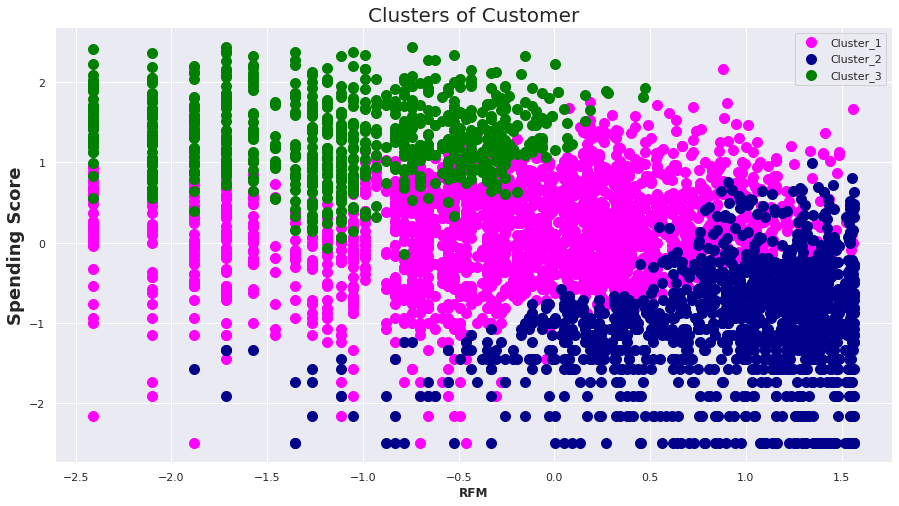

In [160]:
# Plotting agglomerative clustering
plt.figure(figsize=(15,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'magenta', label = 'Cluster_1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'darkblue', label = 'Cluster_2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster_3')      

plt.title('Clusters of Customer', size = 20)
plt.xlabel('RFM', fontweight = 'bold')
plt.ylabel('Spending Score', size = 18, fontweight = 'bold')
plt.legend()
plt.show()

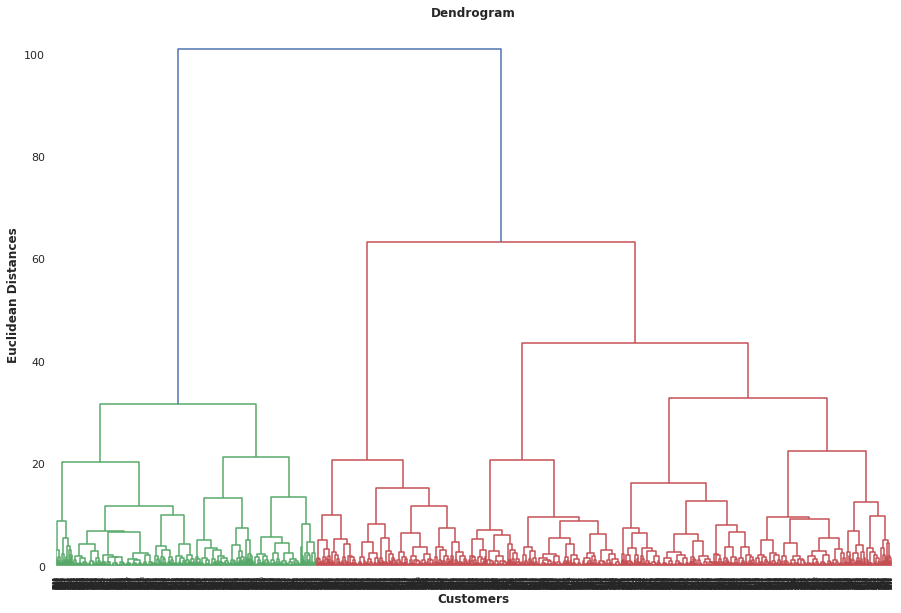

In [161]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
plt.show()

### The more we climb the tree, the more the classes are grouped together and the less they are homogeneous (less intra-class inertia).
### The number of classes is a compromise between the similarity in the classes and the dissimilarity between the classes.

---
### **Cutting Dendogram at the Threshold Value**
#### Now, let’s cut the dendrogram by a threshold value. We have chosen a cut-off or threshold value of 50. At this value, a vertical line can also be drawn. 
#### For a chosen cut-off/threshold value, we can always simply count the number of intersections with vertical lines of the dendrogram to get the number of formed clusters.

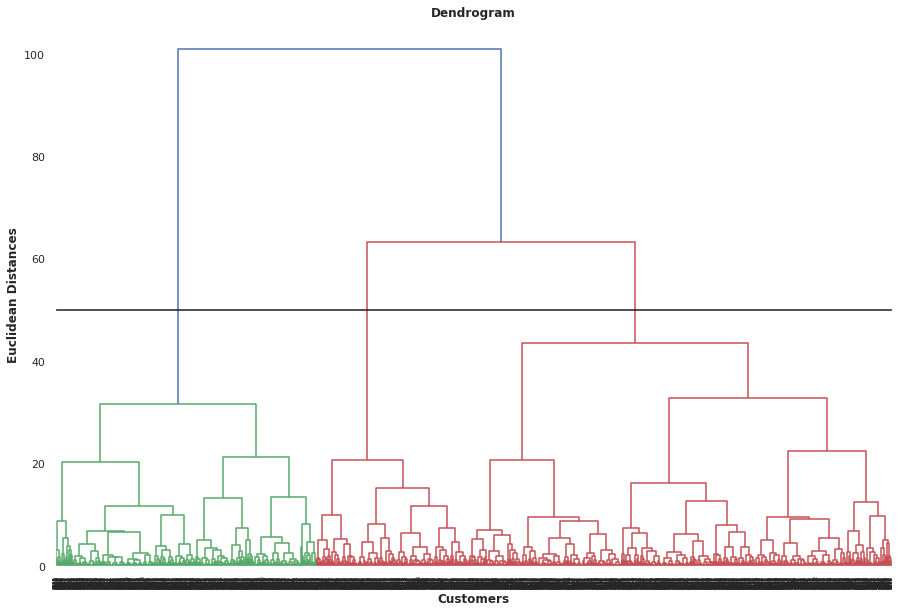

In [162]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 50
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Cutting the dendrogram at max_d
plt.axhline(y = max_d,c = 'k')
plt.title('Dendrogram',fontweight = 'bold')
plt.xlabel('Customers',fontweight = 'bold')
plt.ylabel('Euclidean Distances',fontweight = 'bold')
plt.show()

**As it can be seen in above Dendogram, Say we choose a cut-off of max_d = 50, we’d get 3 final clusters. Similarly if we choose another cut-off like max_d = 40 Then we'd get 4 final clusters.**

## **SUMMARY**

In [163]:
from prettytable import PrettyTable 
  
# Specify the Column Names while initializing the Table 
my_pretty_table = PrettyTable(['Sr. No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
my_pretty_table.add_row(['1','K-Means','RFM',"3"])
my_pretty_table.add_row(['2',"K-Means with silhouette_score ", "RFM", "2"]) 
my_pretty_table.add_row(['3',"K-Means with Elbow method  ", "RFM", "4"])
my_pretty_table.add_row(['4',"Hierarchical clustering  ", "RFM", "2"])
my_pretty_table.add_row(['5',"Hierarchical clustering after Cut-off ", "RFM", "3"])
print(my_pretty_table)

+---------+----------------------------------------+------+---------------------------+
| Sr. No. |               Model_Name               | Data | Optimal_Number_of_cluster |
+---------+----------------------------------------+------+---------------------------+
|    1    |                K-Means                 | RFM  |             3             |
|    2    |     K-Means with silhouette_score      | RFM  |             2             |
|    3    |      K-Means with Elbow method         | RFM  |             4             |
|    4    |       Hierarchical clustering          | RFM  |             2             |
|    5    | Hierarchical clustering after Cut-off  | RFM  |             3             |
+---------+----------------------------------------+------+---------------------------+


#### **CONCLUSION**
* Our data possessed with null values in Customer_Id means there are no information available about their customer IDs. So, keeping them in the dataset would make no sense while applying clusterring.
* We did some feature engineering like creating new columns with InvoiceDate for e.g., Invoice_Year, Invoice_Month, Invoice_Day, Invoice_Hour.
* In Exploratory data analysis we find out different insights like 
 * **Top Customer IDs**: 17841.0, 14911.0, 14096.0, 12748.0, 14606.0	
 * **Top Five Countries**: Uniter Kingdom, Germany, France, Ireland and Spain.
 * **Which Year produced maximum business**: 2011
 * **Month which give maximum business**: November, October, December, September and May.
 * **Maximum purchasing on different days**: Thursday > Wednesday > Tuesday > Monday > Saturday > Friday.
 * **Most of the customers usually purchase products in between 10:00 A.M to 2:00 P.M.**
 * **Top Five products purchasing on the basis of frequency(How frequent customers are willing to bought these products)**
   * WHITE HANGING HEART T-LIGHT HOLDER
   * REGENCY CAKESTAND 3 TIER
   * JUMBO BAG RED RETROSPOT
   * ASSORTED COLOUR BIRD ORNAMENT
   * PARTY BUNTING	
* RFM(Recency, Frequency and Monetary) dataframe ease our problem to solve in a particular order, it makes easy to recommend and display new launched products to few customers.
* Applied different clustering algorithms:
 * **K-Means** = Optimal Clusters(**3**)
 * **K-Means with Silhoutte** = Optimal_Clusters: (**2**)
 * **K-Means with Elbow Method** = Optimal_Clusters: (**4**)
 * **Hierarchical Clustering** = Optimal_Clusters: (**2**)
 * **Hierarchical Clustering with cut-off** = Optimal_Cluster: (**3**)

